In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize the pixel values of the images to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Expand the dimensions of the images to (28, 28, 1) to indicate grayscale
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


4422102/4422102 [==============================] - 0s 0us/step


In [5]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)              

In [6]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))



Epoch 1/10


1875/1875 [==============================] - 19s 9ms/step - loss: 0.4980 - accuracy: 0.8185 - val_loss: 0.3539 - val_accuracy: 0.8717
Epoch 2/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3150 - accuracy: 0.8857 - val_loss: 0.3156 - val_accuracy: 0.8872
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2715 - accuracy: 0.8995 - val_loss: 0.3283 - val_accuracy: 0.8763
Epoch 4/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2409 - accuracy: 0.9111 - val_loss: 0.2832 - val_accuracy: 0.9013
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2167 - accuracy: 0.9199 - val_loss: 0.2606 - val_accuracy: 0.9053
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1992 - accuracy: 0.9262 - val_loss: 0.2589 - val_accuracy: 0.9087
Epoch 7/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1808 - accuracy: 0.9319 - val_loss: 0.2654 -

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')


313/313 [==============================] - 1s 4ms/step - loss: 0.2757 - accuracy: 0.9097
Test accuracy: 0.9096999764442444


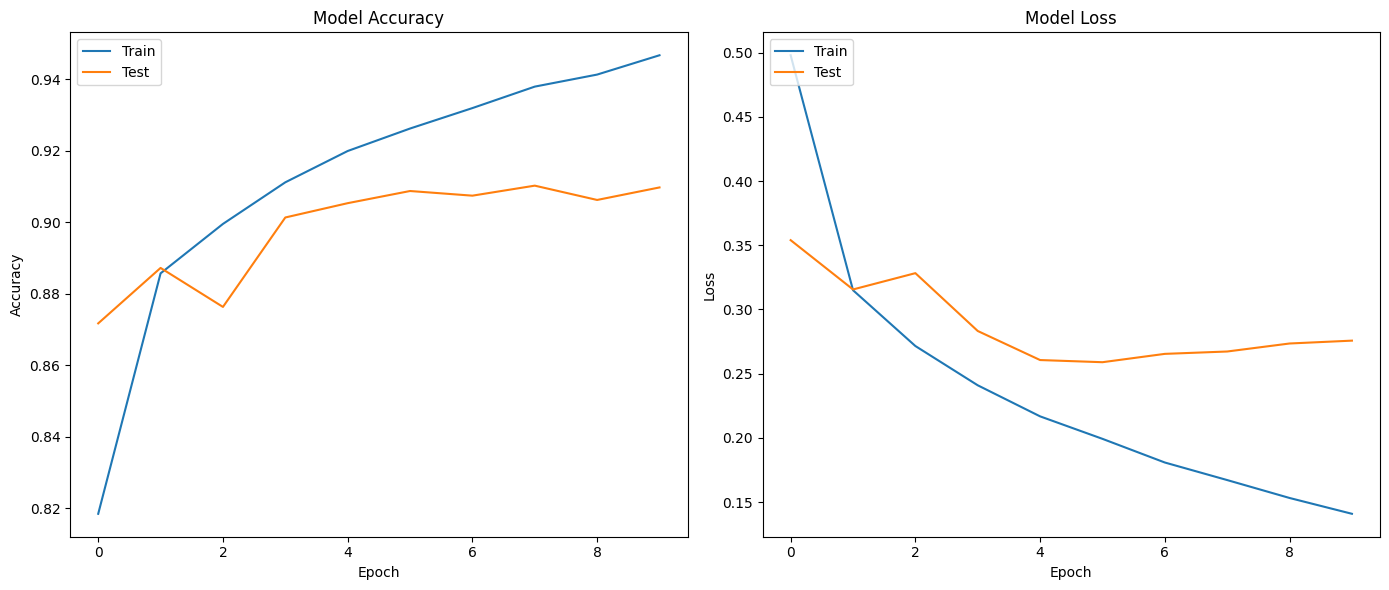

In [8]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()
